# PyTorch Transfer Learning

Goal: We are going to use a pre-trained network to modify its last layer in order to classify our dataset. We'll see how by using a powerful technique called [transfer learning](https://developers.google.com/machine-learning/glossary#transfer-learning).

## 1. Introduction

We've built a few models by hand so far. But their performance has been poor. You might be thinking, is there a well-performing model that already exists for our problem?

**`And in the world of deep learning, the answer is often yes.`**

**[Transfer learning](https://www.learnpytorch.io/06_pytorch_transfer_learning/)** is a machine learning technique where a model developed for a particular task is reused as the starting point for a model on a different but related task. This approach leverages the knowledge gained from solving one problem to help solve another problem, often resulting in improved performance and reduced training time.

### Key Concepts in Transfer Learning:

1. **Pre-trained Models**: In transfer learning, a model is often pre-trained on a large dataset (like ImageNet for image recognition) and then fine-tuned on a smaller, task-specific dataset. The pre-trained model has already learned general features that can be useful for many related tasks.

2. **Fine-Tuning**: This involves taking a pre-trained model and training it further on a new, smaller dataset. The lower layers of the network, which capture more generic features, are usually left unchanged, while the upper layers, which are more task-specific, are modified to better suit the new task.

3. **Feature Extraction**: In some cases, rather than retraining the entire model, only the features learned by the pre-trained model are used. These features are then fed into a new model (such as a classifier) that is trained on the new task.

4. **Domain Adaptation**: Transfer learning often involves adapting a model trained in one domain (e.g., medical images) to perform well in another domain (e.g., satellite images). The model needs to adjust to different data distributions or feature spaces.

### Applications of Transfer Learning:

- **Computer Vision**: Transfer learning is widely used in image classification, object detection, and segmentation tasks, where models pre-trained on large datasets like ImageNet are fine-tuned for specific applications.
  
- **Natural Language Processing (NLP)**: Models like BERT and GPT are pre-trained on vast text corpora and then fine-tuned for tasks such as sentiment analysis, question answering, or language translation.

- **Speech Recognition**: Pre-trained models can be adapted to recognize different accents or dialects by fine-tuning on smaller datasets.

### Advantages of Transfer Learning:

- **Reduced Training Time**: Since the model starts with pre-learned features, it requires less time to converge on the new task.
  
- **Better Performance**: Transfer learning can improve the performance of models, especially when the new dataset is small.

- **Resource Efficiency**: It allows models to be trained with fewer computational resources since not all layers of the network need to be retrained.

In summary, transfer learning enables models to learn new tasks more efficiently by leveraging the knowledge gained from previously learned tasks, making it a powerful tool in machine learning, particularly when data or computational resources are limited.

### Where to find pretrained models

Pre-trained models can be found on various platforms, repositories, and libraries that cater to different machine learning tasks, such as computer vision, natural language processing (NLP), and more. Below are some popular sources for pre-trained models:

#### 1. **Model Zoos and Libraries**

- **TensorFlow Hub**:
  - **URL**: [tfhub.dev](https://tfhub.dev/)
  - **Description**: TensorFlow Hub provides a vast repository of pre-trained models that can be easily integrated into TensorFlow projects. Models cover areas like image classification, text embeddings, and more.

- **PyTorch Hub**:
  - **URL**: [pytorch.org/hub](https://pytorch.org/hub/)
  - **Description**: PyTorch Hub offers a variety of pre-trained models in areas such as vision, language, and speech. Models can be directly loaded and fine-tuned within the PyTorch framework.

- **Hugging Face Model Hub**:
  - **URL**: [huggingface.co/models](https://huggingface.co/models)
  - **Description**: Hugging Face is the go-to platform for NLP models, offering pre-trained models for tasks like text classification, translation, question answering, and more. It also hosts models for vision and other modalities.

- **Keras Applications**:
  - **URL**: [Keras Applications](https://keras.io/api/applications/)
  - **Description**: Keras provides a set of popular pre-trained models for image classification tasks, including models like VGG16, ResNet, and InceptionV3, which can be easily imported and fine-tuned.


#### 2. **GitHub Repositories**

- **Model-Specific Repositories**: Many researchers and organizations release their pre-trained models on GitHub. Examples include:
  - **[OpenAI](https://github.com/openai)**: For models like GPT and CLIP.
  - **[Facebook AI Research (FAIR)](https://github.com/facebookresearch)**: For models like RoBERTa, Mask R-CNN, etc.

#### 3. **Online Platforms and Marketplaces**

- **Google Cloud AI Hub**:
  - **URL**: [aihub.cloud.google.com](https://aihub.cloud.google.com/)
  - **Description**: Google Cloud AI Hub provides access to pre-trained models and pipelines for various tasks, including vision and NLP, which can be deployed on Google Cloud infrastructure.

- **AWS Marketplace**:
  - **URL**: [aws.amazon.com/marketplace](https://aws.amazon.com/marketplace)
  - **Description**: AWS Marketplace offers machine learning models that can be integrated into Amazon's cloud services, including pre-trained models for image recognition, NLP, and more.

- **Microsoft Azure AI Gallery**:
  - **URL**: [gallery.azure.ai](https://gallery.azure.ai/)
  - **Description**: Azure AI Gallery provides pre-trained models and solutions that can be deployed on Microsoft Azure for various tasks, including predictive analytics, NLP, and computer vision.

#### 4. **Research Paper Repositories**

- **Papers with Code**:
  - **URL**: [paperswithcode.com](https://paperswithcode.com/)
  - **Description**: This platform links machine learning papers with their code implementations and often provides pre-trained models. It's a great resource for finding state-of-the-art models.

#### 5. **Specialized Repositories**

- **Model Zoo for Object Detection (Detectron2)**:
  - **URL**: [Detectron2 Model Zoo](https://github.com/facebookresearch/detectron2/blob/main/MODEL_ZOO.md)
  - **Description**: Facebook AI Research's Detectron2 provides a model zoo with pre-trained models for object detection and segmentation tasks.

- **Open Model Zoo (Intel OpenVINO)**:
  - **URL**: [Open Model Zoo](https://github.com/openvinotoolkit/open_model_zoo)
  - **Description**: The Open Model Zoo offers a collection of pre-trained models optimized for Intel hardware, suitable for tasks like computer vision and NLP.

These sources should cover most use cases for obtaining pre-trained models across different domains.

### Transfern Learning vs Fine-Tuning
`Transfer learning and fine-tuning` are related concepts in machine learning, but they differ in their approach and purpose. Here’s an explanation of the difference between the two:

#### **Transfer Learning**
`Transfer learning` is a technique where a model trained on one task or domain is reused for a different but related task or domain. The main idea is to leverage the knowledge gained from the original task to impr`ve performance on the new task, particularly when the new task has a limited amount of data.

- **How it works**:
  - You start with a pre-trained model, such as ResNet-50 trained on ImageNet.
  - The initial layers of the model are typically retained because they capture general features of the domain (e.g., edges, textures, etc., in images).
  - Only the final layers are modified, usually by replacing the output layer to match the specific classes of the new task.

- **Advantages**:
  - Reduces training time.
  - Requires less data for training.
  - Improves performance, especially in tasks with limited data.

#### **Fine-Tuning**
`Fine-tuning` is a specific type of transfer learning, but with a more detailed approach. In fine-tuning, you not only reuse the pre-trained model but also allow some or all of the layers of the model to be retrained on the new dataset. This allows the model to adjust its parameters more precisely for the new task.

- **How it works**:
  - You take a pre-trained model and replace the output layer to match the new classification task.
  - Instead of keeping all layers "frozen" (not trainable), some or all layers of the model are retrained with a smaller, task-specific dataset.
  - Typically, layers closer to the output are trained more aggressively, while earlier layers might be trained with a lower learning rate or kept frozen.

- **Advantages**:
  - Allows the model to adapt more closely to the specific features of the new dataset.
  - Can further improve performance if the new dataset is significantly different from the original dataset.

#### **Key Comparison**:
- **Transfer Learning**: A general approach where a pre-trained model is reused, often with only the final layers retrained or the output layer replaced.
- **Fine-Tuning**: A more specific technique within transfer learning that involves retraining (or adjusting) the entire model or part of the model to better fit the new task, allowing for greater customization and fine-tuning.

In summary, **transfer learning** refers to the overall process of using a pre-trained model for a new task, while **fine-tuning** involves more detailed retraining of the model to optimize its performance on that specific task.

>**In this notebook, transfer learning will be performed. A pre-trained model (ResNet50) will be used, and its last layers will be adjusted to learn how to classify images from the new dataset.**
>
>**Fine-tuning is a specific technique within transfer learning where not only the last layer is retrained, but also some of the previous layers of the pre-trained model. In this case, only the last fully connected layer (model_ft.fc) will be modified, so it will be considered transfer learning and not fine-tuning.**

### Setting up our workspace

First, we check if GPU is connected. The `nvidia-smi` command (NVIDIA System Management Interface) is used to monitor and manage NVIDIA GPUs (Graphics Processing Units) in a system. It provides detailed information about the status and performance of the GPUs, including GPU utilization, temperature, memory usage, processes utilizing the GPU, and more.

**[`nvidia-smi`](https://www.baeldung.com/linux/nvidia-smi-full-gpu-details)** is a command-line utility provided by NVIDIA that helps you manage and monitor NVIDIA GPU devices. It stands for NVIDIA System Management Interface.

---
**Display Basic GPU Information**

---

In [ ]:
!nvidia-smi

Thu Aug  8 11:26:07 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

### Setting our workspace: `/content` and `/content/datasets`


---
**Setting our Home**

---

We save the root directory of the project '/content' as 'HOME' since we will be navigating through the directory to have multiple projects under the same HOME. Additionally, we will have the datasets in the 'datasets' directory, so all datasets are easily accessible for any project.

In [ ]:
# Setting our $HOME to /content

import os
HOME = os.getcwd()
print(HOME)

/content


Next, it imports the drive module from the google.colab library, which provides functionalities for mounting Google Drive in Google Colab.

Additionally, Google Drive is mounted in Google Colab and made available at the path /content/drive. The user will be prompted to authorize access to Google Drive. Once authorized, the content of Google Drive will be accessible from that point onwards in the Colab notebook.

---
**Mount Google Drive**

---

In [ ]:
try:
    import google.colab
    IN_COLAB = True
except ImportError:
    IN_COLAB = False

if IN_COLAB:
    from google.colab import drive
    drive.mount('/content/drive')
    print("Google Drive is mounted.")
else:
    print("You aren't in Google Colab.")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Google Drive is mounted.


## 2. Load a dataset (dataloader)

Create the dataset directory (if it doesn't exist), where we are going to save the dataset with which we are going to train our CNN.

---
**Create a directory where we can save our dataset**

---

In [ ]:
import os
datasets_dir = os.path.join(HOME, "datasets")
os.makedirs(datasets_dir, exist_ok=True)
print(os.getcwd())

/content


---
**Change to new directory datasets**

---

In [ ]:
%%time

# Change to new datasets folder
os.chdir(datasets_dir)
print('dataset_dir =', os.getcwd())
if  not os.path.isfile('exp4val.zip'):
  !wget -q https://www.dropbox.com/s/nzrvuoos7sgl5dh/exp4val.zip
  !unzip -qq -o exp4val.zip

dataset_dir = /content/datasets
CPU times: user 54.1 ms, sys: 4.84 ms, total: 59 ms
Wall time: 5.83 s


### Inspect the Dataset: Skin lesion recognition in 7 classes:

*  0: 'akiec' - actinic keratosis

*  1: 'bcc' - basal cell carcinoma

*  2: 'bkl' - benign keratosis

*  3: 'df' - dermatofibroma

*  4: 'mel' - melanoma

*  5: 'nv' - melanocytic nevus

*  6: 'vasc' - vascular lesion


The dataset contains several thousand photos of cell images in seven subdirectories (classes) with one cell image per class. The directory structure is as follows thanks to this snipet:

---
**Display the datapath structure.**

---

In [ ]:
import os

def print_directory_tree(root_dir, level=0):
    """
    Recursively prints the directory tree structure, only listing directories.
    """
    prefix = " " * (level * 4) + "|-- " if level > 0 else ""
    print(prefix + os.path.basename(root_dir))

    if os.path.isdir(root_dir):
        for item in os.listdir(root_dir):
            item_path = os.path.join(root_dir, item)
            if os.path.isdir(item_path):
                print_directory_tree(item_path, level + 1)

# Define the data directory
data_dir = datasets_dir

# Print the directory tree
print_directory_tree(data_dir)

datasets
    |-- __MACOSX
        |-- train
            |-- class_1
            |-- class_2
            |-- class_0
            |-- class_3
            |-- class_6
            |-- class_4
            |-- class_5
        |-- val
            |-- class_0
        |-- test
            |-- class_1
    |-- train
        |-- class_1
        |-- class_2
        |-- class_0
        |-- class_3
        |-- class_6
        |-- class_4
        |-- class_5
    |-- val
        |-- class_1
        |-- class_2
        |-- class_0
        |-- class_3
        |-- class_6
        |-- class_4
        |-- class_5
    |-- test
        |-- class_1
        |-- class_2
        |-- class_0
        |-- class_3
        |-- class_6
        |-- class_4
        |-- class_5



---
**Display 8 images from a class from test**

---

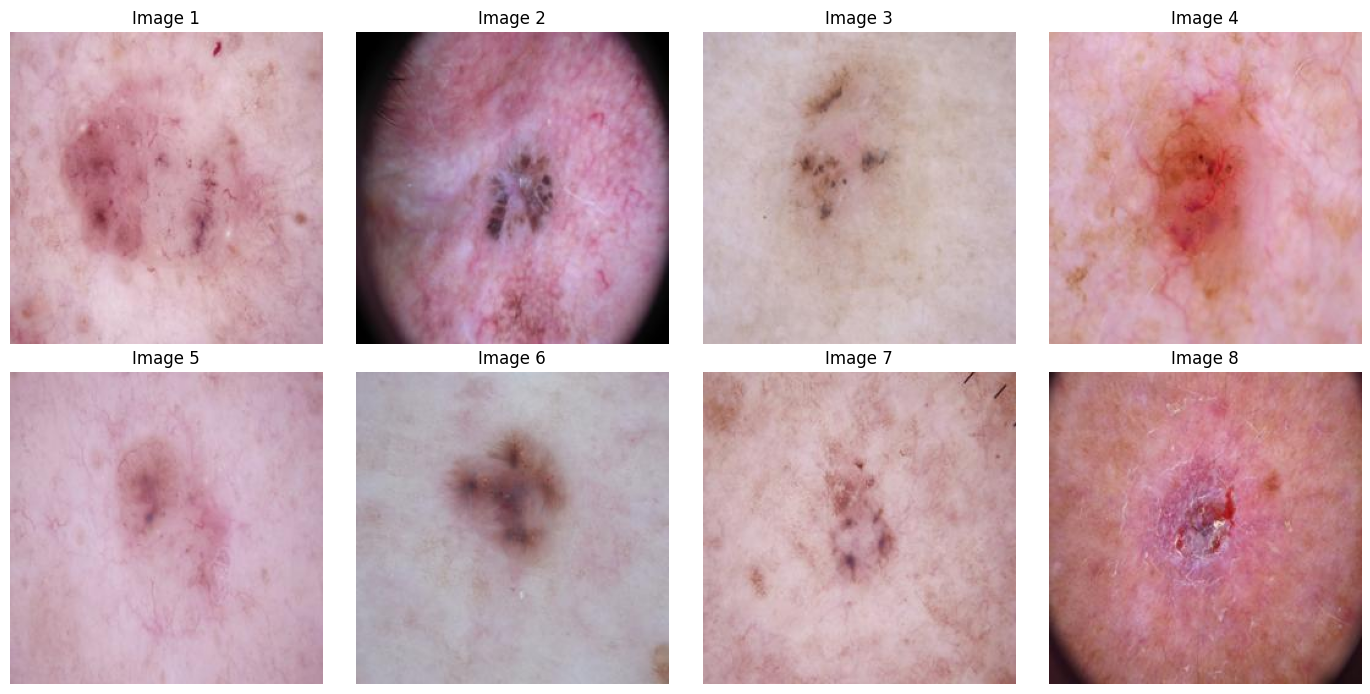

In [ ]:
# creates a figure with subplots arranged in a 2x4 grid
import matplotlib.pyplot as plt
import glob
import matplotlib.image as mpimg

# Directory of the images
image_directory = f'{HOME}/datasets/test/class_1/'

# List of image paths
image_paths = glob.glob(image_directory + '*.jpg')[:8]

# Set up the figure with subplots
fig, axs = plt.subplots(2, 4, figsize=(14, 7))

# Iterate through the images and display them in the subplots
for i, image_path in enumerate(image_paths):
    row = i // 4
    col = i % 4
    img = mpimg.imread(image_path)
    axs[row, col].imshow(img)
    axs[row, col].set_title(f'Image {i + 1}')
    axs[row, col].axis('off')

# Adjust the layout of the subplots
plt.tight_layout()
plt.show()
print("\n Size of image: ", img.shape)

### Setting a Dataloader

The purpose of a **DataLoader** is fundamental in the context of machine learning and deep learning, especially when working with large or complex datasets. Its main purpose is to facilitate the efficient loading and manipulation of data during model training.

---
**Transform Dataloader for data augmentation**

---

In [ ]:
from torchvision import datasets, models, transforms

data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'test': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

---
**Dataloaders**

---

In [ ]:
import torch
from torch.utils.data import DataLoader

# Configuraciones
data_dir = f'{HOME}/datasets'
num_classes = 7
batch_size = 32
num_epochs = 100
feature_extract = True


image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'val', 'test']}
dataloaders = {x: DataLoader(image_datasets[x], batch_size=batch_size,
                             shuffle=True, num_workers=2)
               for x in ['train', 'val', 'test']}

dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val', 'test']}
class_names = image_datasets['train'].classes
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

---
**Initializing a ResNet50 model for transfer learning**

---

In [ ]:
import torch.nn as nn
import torch.optim as optim

# Parameters of a model require gradient computation during training?
def set_parameter_requires_grad(model, feature_extracting):
    if feature_extracting:
        for param in model.parameters():
            param.requires_grad = False

# Initializes a ResNet50 model for transfer learning
def initialize_model(num_classes, feature_extract, use_pretrained=True):
    model_ft = models.resnet50(weights=models.ResNet50_Weights.DEFAULT if use_pretrained else None)
    set_parameter_requires_grad(model_ft, feature_extract)
    num_ftrs = model_ft.fc.in_features
    model_ft.fc = nn.Linear(num_ftrs, num_classes)
    return model_ft

model_ft = initialize_model(num_classes, feature_extract, use_pretrained=True)
model_ft = model_ft.to(device)

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 173MB/s]


ResNet-50 is a deep neural network designed for computer vision tasks, such as image classification. "ResNet" stands for **Residual Network**, and "50" indicates that the network is 50 layers deep.

### What is ResNet-50?

ResNet-50 is part of the ResNet family of models, which were introduced by researchers from Microsoft Research (Kaiming He et al.) in their 2015 paper "[Deep Residual Learning for Image Recognition.](https://arxiv.org/abs/1512.03385)" This architecture gained fame for its outstanding performance in image classification challenges, such as the ImageNet Large Scale Visual Recognition Challenge (ILSVRC).

### Problem Solved: Degradation in Deep Networks

One of the challenges in training very deep neural networks is the **degradation problem**. As networks get deeper, their performance on the training task tends to degrade, not because of overfitting, but due to difficulties in optimizing a deep network, such as vanishing gradients.

### Residual Architecture

The key innovation in ResNet-50 is its **residual architecture**, which introduces the idea of residual or "skip connections." These connections allow the input of one layer to bypass several layers and be added to the output of a later layer. This makes it easier for the layers to learn an identity function if necessary, enabling the network to learn more complex functions.

Mathematically, instead of a layer learning a function \( H(x) \) directly, it is reformulated so that the layer learns a residual function \( F(x) \), where \( H(x) = F(x) + x \). Here, \( x \) is the original input, and \( F(x) \) is the transformation learned by the intermediate layers.

### Structure of ResNet-50

ResNet-50 is a specific variant with 50 layers, consisting of:
- **1 initial convolutional layer** (7x7 convolutions with a stride of 2).
- **4 main blocks of residual layers**: Each block has multiple convolutional layers and is where the residual connections are applied. The blocks are organized as follows:
  - Block 1: 3 layers
  - Block 2: 4 layers
  - Block 3: 6 layers
  - Block 4: 3 layers
- **1 global average pooling layer** at the end.
- **1 fully connected layer** for the final classification.

The network uses **1x1** and **3x3 convolutions** within its blocks, and the inclusion of 1x1 convolutions helps reduce dimensionality, which is crucial for making the network computationally efficient.

### Applications

ResNet-50 has become a standard architecture used in many computer vision applications, including:
- **Image Classification**: To categorize images into a large number of classes.
- **Object Detection**: Used as a backbone in more complex algorithms to locate and classify objects within images.
- **Image Segmentation**: As part of pipelines that segment and label each pixel in an image.

### Advantages of ResNet-50

- **Depth**: The network is deep enough to capture complex features in images.
- **Avoids Degradation**: Thanks to the residual connections, ResNet-50 can be effectively trained even with a large number of layers.
- **Versatility**: It has proven to be very versatile and can be used as the basis for many other computer vision tasks.

In summary, ResNet-50 is a powerful and widely used model in the field of computer vision, capable of handling complex classification and detection tasks thanks to its innovative residual architecture.

---
**Show ResNet50 architecture**

---

In [ ]:
!pip install -q torchinfo

In [ ]:
import torchinfo

# Print a summary using torchinfo (uncomment for actual output)
torchinfo.summary(model=model_ft,
        input_size=(32, 3, 224, 224), # make sure this is "input_size", not "input_shape"
        # col_names=["input_size"], # uncomment for smaller output
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
)

Layer (type (var_name))                  Input Shape          Output Shape         Param #              Trainable
ResNet (ResNet)                          [32, 3, 224, 224]    [32, 7]              --                   Partial
├─Conv2d (conv1)                         [32, 3, 224, 224]    [32, 64, 112, 112]   (9,408)              False
├─BatchNorm2d (bn1)                      [32, 64, 112, 112]   [32, 64, 112, 112]   (128)                False
├─ReLU (relu)                            [32, 64, 112, 112]   [32, 64, 112, 112]   --                   --
├─MaxPool2d (maxpool)                    [32, 64, 112, 112]   [32, 64, 56, 56]     --                   --
├─Sequential (layer1)                    [32, 64, 56, 56]     [32, 256, 56, 56]    --                   False
│    └─Bottleneck (0)                    [32, 64, 56, 56]     [32, 256, 56, 56]    --                   False
│    │    └─Conv2d (conv1)               [32, 64, 56, 56]     [32, 64, 56, 56]     (4,096)              False
│    │    

## 3. Train model

---
**Define loss and optimizer**

---

In [ ]:
# Configuración del optimizador
params_to_update = model_ft.parameters()
if feature_extract:
    params_to_update = [param for param in model_ft.parameters() if param.requires_grad]

optimizer_ft = optim.SGD(params_to_update, lr=0.001, momentum=0.9)
criterion = nn.CrossEntropyLoss()


---

**Define training**

---

In [ ]:
from tqdm import tqdm

def train_model(model, dataloaders, criterion, optimizer, num_epochs=num_epochs):
    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    # Listas para almacenar las métricas
    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []

    for epoch in range(num_epochs):
        print(f'Epoch {epoch+1}/{num_epochs}')
        print('-' * 10)

        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()
            else:
                model.eval()

            running_loss = 0.0
            running_corrects = 0

            # Usar tqdm para la barra de progreso
            with tqdm(dataloaders[phase], unit="batch") as tepoch:
                for inputs, labels in tepoch:
                    tepoch.set_description(f"Phase {phase} Epoch {epoch+1}/{num_epochs}")

                    inputs = inputs.to(device)
                    labels = labels.to(device)

                    optimizer.zero_grad()

                    with torch.set_grad_enabled(phase == 'train'):
                        outputs = model(inputs)
                        _, preds = torch.max(outputs, 1)
                        loss = criterion(outputs, labels)

                        if phase == 'train':
                            loss.backward()
                            optimizer.step()

                    running_loss += loss.item() * inputs.size(0)
                    running_corrects += torch.sum(preds == labels.data)

                    # Actualiza la barra de progreso con la pérdida y la precisión
                    tepoch.set_postfix(loss=loss.item(), accuracy=torch.sum(preds == labels.data).item()/inputs.size(0))

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

            # Almacenar las métricas
            if phase == 'train':
                train_losses.append(epoch_loss)
                train_accuracies.append(epoch_acc.item())
            else:
                val_losses.append(epoch_loss)
                val_accuracies.append(epoch_acc.item())

            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    print(f'Best val Acc: {best_acc:4f}')
    model.load_state_dict(best_model_wts)

    return model, train_losses, val_losses, train_accuracies, val_accuracies

---
**Train model**

---

In [ ]:
# Set the random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)


# Entrenar el modelo
import copy
model_ft, train_losses, val_losses, train_accuracies, val_accuracies = train_model(
    model_ft, dataloaders, criterion, optimizer_ft, num_epochs=num_epochs
)

# Guardar el modelo
torch.save(model_ft.state_dict(), 'best_model.pth')

# Evaluar el modelo en el conjunto de prueba
model_ft.eval()
running_corrects = 0

Epoch 1/100
----------


Phase train Epoch 1/100: 100%|██████████| 230/230 [00:41<00:00,  5.48batch/s, accuracy=0.273, loss=1.69]


train Loss: 1.7300 Acc: 0.3804


Phase val Epoch 1/100: 100%|██████████| 33/33 [00:03<00:00,  8.39batch/s, accuracy=0.5, loss=1.62]


val Loss: 1.5715 Acc: 0.4762

Epoch 2/100
----------


Phase train Epoch 2/100: 100%|██████████| 230/230 [00:31<00:00,  7.21batch/s, accuracy=0.5, loss=1.36]


train Loss: 1.4812 Acc: 0.4955


Phase val Epoch 2/100: 100%|██████████| 33/33 [00:03<00:00,  8.94batch/s, accuracy=0.731, loss=1.2]


val Loss: 1.4272 Acc: 0.5229

Epoch 3/100
----------


Phase train Epoch 3/100: 100%|██████████| 230/230 [00:33<00:00,  6.96batch/s, accuracy=0.591, loss=1.25]


train Loss: 1.3862 Acc: 0.5162


Phase val Epoch 3/100: 100%|██████████| 33/33 [00:04<00:00,  7.29batch/s, accuracy=0.538, loss=1.34]


val Loss: 1.3712 Acc: 0.5171

Epoch 4/100
----------


Phase train Epoch 4/100: 100%|██████████| 230/230 [00:33<00:00,  6.87batch/s, accuracy=0.455, loss=1.44]


train Loss: 1.3166 Acc: 0.5350


Phase val Epoch 4/100: 100%|██████████| 33/33 [00:03<00:00,  8.64batch/s, accuracy=0.577, loss=1.33]


val Loss: 1.3203 Acc: 0.5381

Epoch 5/100
----------


Phase train Epoch 5/100: 100%|██████████| 230/230 [00:32<00:00,  7.09batch/s, accuracy=0.636, loss=1.34]


train Loss: 1.2722 Acc: 0.5490


Phase val Epoch 5/100: 100%|██████████| 33/33 [00:03<00:00,  8.26batch/s, accuracy=0.577, loss=1.36]


val Loss: 1.2996 Acc: 0.5324

Epoch 6/100
----------


Phase train Epoch 6/100: 100%|██████████| 230/230 [00:33<00:00,  6.88batch/s, accuracy=0.455, loss=1.36]


train Loss: 1.2513 Acc: 0.5601


Phase val Epoch 6/100: 100%|██████████| 33/33 [00:04<00:00,  8.14batch/s, accuracy=0.538, loss=1.23]


val Loss: 1.2665 Acc: 0.5533

Epoch 7/100
----------


Phase train Epoch 7/100: 100%|██████████| 230/230 [00:32<00:00,  7.05batch/s, accuracy=0.682, loss=1.22]


train Loss: 1.2268 Acc: 0.5614


Phase val Epoch 7/100: 100%|██████████| 33/33 [00:03<00:00,  8.60batch/s, accuracy=0.538, loss=1.16]


val Loss: 1.2516 Acc: 0.5571

Epoch 8/100
----------


Phase train Epoch 8/100: 100%|██████████| 230/230 [00:33<00:00,  6.79batch/s, accuracy=0.636, loss=1.21]


train Loss: 1.2145 Acc: 0.5725


Phase val Epoch 8/100: 100%|██████████| 33/33 [00:04<00:00,  7.38batch/s, accuracy=0.5, loss=1.17]


val Loss: 1.2344 Acc: 0.5705

Epoch 9/100
----------


Phase train Epoch 9/100: 100%|██████████| 230/230 [00:32<00:00,  7.09batch/s, accuracy=0.545, loss=1.13]


train Loss: 1.1853 Acc: 0.5778


Phase val Epoch 9/100: 100%|██████████| 33/33 [00:03<00:00,  8.64batch/s, accuracy=0.5, loss=1.45]


val Loss: 1.2029 Acc: 0.5724

Epoch 10/100
----------


Phase train Epoch 10/100: 100%|██████████| 230/230 [00:32<00:00,  7.09batch/s, accuracy=0.727, loss=0.995]


train Loss: 1.1711 Acc: 0.5793


Phase val Epoch 10/100: 100%|██████████| 33/33 [00:04<00:00,  7.52batch/s, accuracy=0.423, loss=1.34]


val Loss: 1.1891 Acc: 0.5790

Epoch 11/100
----------


Phase train Epoch 11/100: 100%|██████████| 230/230 [00:32<00:00,  6.98batch/s, accuracy=0.682, loss=0.906]


train Loss: 1.1550 Acc: 0.5837


Phase val Epoch 11/100: 100%|██████████| 33/33 [00:03<00:00,  8.71batch/s, accuracy=0.692, loss=0.974]


val Loss: 1.1754 Acc: 0.6086

Epoch 12/100
----------


Phase train Epoch 12/100: 100%|██████████| 230/230 [00:33<00:00,  6.91batch/s, accuracy=0.727, loss=0.953]


train Loss: 1.1446 Acc: 0.5903


Phase val Epoch 12/100: 100%|██████████| 33/33 [00:03<00:00,  8.74batch/s, accuracy=0.769, loss=0.863]


val Loss: 1.1853 Acc: 0.5895

Epoch 13/100
----------


Phase train Epoch 13/100: 100%|██████████| 230/230 [00:32<00:00,  6.97batch/s, accuracy=0.455, loss=1.27]


train Loss: 1.1346 Acc: 0.5959


Phase val Epoch 13/100: 100%|██████████| 33/33 [00:04<00:00,  7.40batch/s, accuracy=0.615, loss=1.13]


val Loss: 1.1634 Acc: 0.5867

Epoch 14/100
----------


Phase train Epoch 14/100: 100%|██████████| 230/230 [00:32<00:00,  7.10batch/s, accuracy=0.591, loss=1.02]


train Loss: 1.1110 Acc: 0.6088


Phase val Epoch 14/100: 100%|██████████| 33/33 [00:03<00:00,  8.62batch/s, accuracy=0.692, loss=0.979]


val Loss: 1.1541 Acc: 0.5895

Epoch 15/100
----------


Phase train Epoch 15/100: 100%|██████████| 230/230 [00:33<00:00,  6.84batch/s, accuracy=0.455, loss=1.47]


train Loss: 1.1062 Acc: 0.6037


Phase val Epoch 15/100: 100%|██████████| 33/33 [00:04<00:00,  6.99batch/s, accuracy=0.654, loss=1.31]


val Loss: 1.1442 Acc: 0.6114

Epoch 16/100
----------


Phase train Epoch 16/100: 100%|██████████| 230/230 [00:32<00:00,  7.08batch/s, accuracy=0.591, loss=1.08]


train Loss: 1.0948 Acc: 0.6137


Phase val Epoch 16/100: 100%|██████████| 33/33 [00:03<00:00,  8.65batch/s, accuracy=0.5, loss=1.23]


val Loss: 1.1447 Acc: 0.5971

Epoch 17/100
----------


Phase train Epoch 17/100: 100%|██████████| 230/230 [00:32<00:00,  7.09batch/s, accuracy=0.545, loss=1.11]


train Loss: 1.0963 Acc: 0.6069


Phase val Epoch 17/100: 100%|██████████| 33/33 [00:04<00:00,  8.22batch/s, accuracy=0.577, loss=1.2]


val Loss: 1.1175 Acc: 0.6086

Epoch 18/100
----------


Phase train Epoch 18/100: 100%|██████████| 230/230 [00:33<00:00,  6.96batch/s, accuracy=0.5, loss=1.27]


train Loss: 1.0751 Acc: 0.6144


Phase val Epoch 18/100: 100%|██████████| 33/33 [00:04<00:00,  8.12batch/s, accuracy=0.538, loss=1.24]


val Loss: 1.1049 Acc: 0.6181

Epoch 19/100
----------


Phase train Epoch 19/100: 100%|██████████| 230/230 [00:32<00:00,  7.05batch/s, accuracy=0.591, loss=1.06]


train Loss: 1.0798 Acc: 0.6135


Phase val Epoch 19/100: 100%|██████████| 33/33 [00:03<00:00,  8.58batch/s, accuracy=0.654, loss=1]


val Loss: 1.1093 Acc: 0.6076

Epoch 20/100
----------


Phase train Epoch 20/100: 100%|██████████| 230/230 [00:34<00:00,  6.61batch/s, accuracy=0.591, loss=1.1]


train Loss: 1.0712 Acc: 0.6199


Phase val Epoch 20/100: 100%|██████████| 33/33 [00:04<00:00,  7.79batch/s, accuracy=0.654, loss=1.05]


val Loss: 1.1038 Acc: 0.6143

Epoch 21/100
----------


Phase train Epoch 21/100: 100%|██████████| 230/230 [00:32<00:00,  7.07batch/s, accuracy=0.727, loss=0.953]


train Loss: 1.0635 Acc: 0.6239


Phase val Epoch 21/100: 100%|██████████| 33/33 [00:03<00:00,  8.66batch/s, accuracy=0.692, loss=1.05]


val Loss: 1.0822 Acc: 0.6314

Epoch 22/100
----------


Phase train Epoch 22/100: 100%|██████████| 230/230 [00:32<00:00,  7.10batch/s, accuracy=0.545, loss=1.3]


train Loss: 1.0625 Acc: 0.6241


Phase val Epoch 22/100: 100%|██████████| 33/33 [00:04<00:00,  7.32batch/s, accuracy=0.654, loss=0.987]


val Loss: 1.0915 Acc: 0.6029

Epoch 23/100
----------


Phase train Epoch 23/100: 100%|██████████| 230/230 [00:33<00:00,  6.78batch/s, accuracy=0.591, loss=1.07]


train Loss: 1.0467 Acc: 0.6312


Phase val Epoch 23/100: 100%|██████████| 33/33 [00:03<00:00,  8.49batch/s, accuracy=0.5, loss=1.17]


val Loss: 1.1117 Acc: 0.6143

Epoch 24/100
----------


Phase train Epoch 24/100: 100%|██████████| 230/230 [00:33<00:00,  6.95batch/s, accuracy=0.545, loss=1.27]


train Loss: 1.0493 Acc: 0.6279


Phase val Epoch 24/100: 100%|██████████| 33/33 [00:04<00:00,  7.12batch/s, accuracy=0.462, loss=1.21]


val Loss: 1.0750 Acc: 0.6190

Epoch 25/100
----------


Phase train Epoch 25/100: 100%|██████████| 230/230 [00:34<00:00,  6.75batch/s, accuracy=0.773, loss=1.02]


train Loss: 1.0564 Acc: 0.6230


Phase val Epoch 25/100: 100%|██████████| 33/33 [00:03<00:00,  8.55batch/s, accuracy=0.462, loss=1.1]


val Loss: 1.0765 Acc: 0.6124

Epoch 26/100
----------


Phase train Epoch 26/100: 100%|██████████| 230/230 [00:34<00:00,  6.76batch/s, accuracy=0.682, loss=1.05]


train Loss: 1.0293 Acc: 0.6299


Phase val Epoch 26/100: 100%|██████████| 33/33 [00:04<00:00,  7.53batch/s, accuracy=0.5, loss=1.23]


val Loss: 1.0670 Acc: 0.6181

Epoch 27/100
----------


Phase train Epoch 27/100: 100%|██████████| 230/230 [00:33<00:00,  6.79batch/s, accuracy=0.5, loss=1.2]


train Loss: 1.0313 Acc: 0.6369


Phase val Epoch 27/100: 100%|██████████| 33/33 [00:03<00:00,  8.58batch/s, accuracy=0.654, loss=0.964]


val Loss: 1.0694 Acc: 0.6200

Epoch 28/100
----------


Phase train Epoch 28/100: 100%|██████████| 230/230 [00:33<00:00,  6.89batch/s, accuracy=0.591, loss=1.15]


train Loss: 1.0234 Acc: 0.6400


Phase val Epoch 28/100: 100%|██████████| 33/33 [00:04<00:00,  7.81batch/s, accuracy=0.538, loss=1.17]


val Loss: 1.0486 Acc: 0.6267

Epoch 29/100
----------


Phase train Epoch 29/100: 100%|██████████| 230/230 [00:33<00:00,  6.92batch/s, accuracy=0.773, loss=0.674]


train Loss: 1.0185 Acc: 0.6434


Phase val Epoch 29/100: 100%|██████████| 33/33 [00:03<00:00,  8.69batch/s, accuracy=0.654, loss=1.05]


val Loss: 1.0610 Acc: 0.6343

Epoch 30/100
----------


Phase train Epoch 30/100: 100%|██████████| 230/230 [00:32<00:00,  7.06batch/s, accuracy=0.545, loss=1.09]


train Loss: 1.0144 Acc: 0.6395


Phase val Epoch 30/100: 100%|██████████| 33/33 [00:03<00:00,  8.55batch/s, accuracy=0.538, loss=1.08]


val Loss: 1.0587 Acc: 0.6257

Epoch 31/100
----------


Phase train Epoch 31/100: 100%|██████████| 230/230 [00:33<00:00,  6.89batch/s, accuracy=0.591, loss=1.39]


train Loss: 1.0162 Acc: 0.6405


Phase val Epoch 31/100: 100%|██████████| 33/33 [00:04<00:00,  7.48batch/s, accuracy=0.423, loss=1.23]


val Loss: 1.0559 Acc: 0.6276

Epoch 32/100
----------


Phase train Epoch 32/100: 100%|██████████| 230/230 [00:32<00:00,  7.05batch/s, accuracy=0.591, loss=1.35]


train Loss: 1.0049 Acc: 0.6469


Phase val Epoch 32/100: 100%|██████████| 33/33 [00:03<00:00,  8.57batch/s, accuracy=0.615, loss=0.958]


val Loss: 1.0335 Acc: 0.6324

Epoch 33/100
----------


Phase train Epoch 33/100: 100%|██████████| 230/230 [00:32<00:00,  7.02batch/s, accuracy=0.545, loss=1.06]


train Loss: 1.0124 Acc: 0.6412


Phase val Epoch 33/100: 100%|██████████| 33/33 [00:04<00:00,  7.46batch/s, accuracy=0.615, loss=0.958]


val Loss: 1.0511 Acc: 0.6276

Epoch 34/100
----------


Phase train Epoch 34/100: 100%|██████████| 230/230 [00:33<00:00,  6.96batch/s, accuracy=0.727, loss=0.666]


train Loss: 1.0052 Acc: 0.6404


Phase val Epoch 34/100: 100%|██████████| 33/33 [00:03<00:00,  8.56batch/s, accuracy=0.846, loss=0.804]


val Loss: 1.0466 Acc: 0.6219

Epoch 35/100
----------


Phase train Epoch 35/100: 100%|██████████| 230/230 [00:32<00:00,  7.07batch/s, accuracy=0.773, loss=0.837]


train Loss: 1.0096 Acc: 0.6423


Phase val Epoch 35/100: 100%|██████████| 33/33 [00:03<00:00,  8.40batch/s, accuracy=0.615, loss=1.01]


val Loss: 1.0304 Acc: 0.6333

Epoch 36/100
----------


Phase train Epoch 36/100: 100%|██████████| 230/230 [00:33<00:00,  6.86batch/s, accuracy=0.636, loss=1.22]


train Loss: 0.9895 Acc: 0.6517


Phase val Epoch 36/100: 100%|██████████| 33/33 [00:04<00:00,  7.93batch/s, accuracy=0.385, loss=1.64]


val Loss: 1.0245 Acc: 0.6238

Epoch 37/100
----------


Phase train Epoch 37/100: 100%|██████████| 230/230 [00:33<00:00,  6.91batch/s, accuracy=0.636, loss=0.96]


train Loss: 0.9917 Acc: 0.6484


Phase val Epoch 37/100: 100%|██████████| 33/33 [00:03<00:00,  8.42batch/s, accuracy=0.538, loss=1.24]


val Loss: 1.0278 Acc: 0.6362

Epoch 38/100
----------


Phase train Epoch 38/100: 100%|██████████| 230/230 [00:32<00:00,  7.07batch/s, accuracy=0.773, loss=0.921]


train Loss: 0.9784 Acc: 0.6521


Phase val Epoch 38/100: 100%|██████████| 33/33 [00:04<00:00,  7.01batch/s, accuracy=0.423, loss=1.23]


val Loss: 1.0269 Acc: 0.6324

Epoch 39/100
----------


Phase train Epoch 39/100: 100%|██████████| 230/230 [00:32<00:00,  7.05batch/s, accuracy=0.545, loss=1.2]


train Loss: 0.9859 Acc: 0.6491


Phase val Epoch 39/100: 100%|██████████| 33/33 [00:03<00:00,  8.61batch/s, accuracy=0.731, loss=0.944]


val Loss: 1.0154 Acc: 0.6400

Epoch 40/100
----------


Phase train Epoch 40/100: 100%|██████████| 230/230 [00:32<00:00,  7.07batch/s, accuracy=0.818, loss=0.652]


train Loss: 0.9872 Acc: 0.6483


Phase val Epoch 40/100: 100%|██████████| 33/33 [00:04<00:00,  7.78batch/s, accuracy=0.654, loss=0.939]


val Loss: 1.0219 Acc: 0.6352

Epoch 41/100
----------


Phase train Epoch 41/100: 100%|██████████| 230/230 [00:34<00:00,  6.73batch/s, accuracy=0.591, loss=0.868]


train Loss: 0.9831 Acc: 0.6550


Phase val Epoch 41/100: 100%|██████████| 33/33 [00:03<00:00,  8.56batch/s, accuracy=0.692, loss=0.902]


val Loss: 1.0199 Acc: 0.6286

Epoch 42/100
----------


Phase train Epoch 42/100: 100%|██████████| 230/230 [00:33<00:00,  6.95batch/s, accuracy=0.591, loss=1.01]


train Loss: 0.9840 Acc: 0.6527


Phase val Epoch 42/100: 100%|██████████| 33/33 [00:04<00:00,  8.12batch/s, accuracy=0.577, loss=1.08]


val Loss: 1.0293 Acc: 0.6419

Epoch 43/100
----------


Phase train Epoch 43/100: 100%|██████████| 230/230 [00:34<00:00,  6.71batch/s, accuracy=0.682, loss=1.08]


train Loss: 0.9855 Acc: 0.6479


Phase val Epoch 43/100: 100%|██████████| 33/33 [00:03<00:00,  8.64batch/s, accuracy=0.577, loss=1.28]


val Loss: 1.0343 Acc: 0.6210

Epoch 44/100
----------


Phase train Epoch 44/100: 100%|██████████| 230/230 [00:33<00:00,  6.83batch/s, accuracy=0.591, loss=1.16]


train Loss: 0.9674 Acc: 0.6537


Phase val Epoch 44/100: 100%|██████████| 33/33 [00:04<00:00,  8.13batch/s, accuracy=0.462, loss=1.22]


val Loss: 1.0152 Acc: 0.6305

Epoch 45/100
----------


Phase train Epoch 45/100: 100%|██████████| 230/230 [00:33<00:00,  6.82batch/s, accuracy=0.455, loss=1.26]


train Loss: 0.9656 Acc: 0.6588


Phase val Epoch 45/100: 100%|██████████| 33/33 [00:03<00:00,  8.59batch/s, accuracy=0.731, loss=1.02]


val Loss: 1.0041 Acc: 0.6495

Epoch 46/100
----------


Phase train Epoch 46/100: 100%|██████████| 230/230 [00:32<00:00,  7.06batch/s, accuracy=0.727, loss=0.965]


train Loss: 0.9593 Acc: 0.6603


Phase val Epoch 46/100: 100%|██████████| 33/33 [00:03<00:00,  8.42batch/s, accuracy=0.615, loss=1.17]


val Loss: 1.0225 Acc: 0.6381

Epoch 47/100
----------


Phase train Epoch 47/100: 100%|██████████| 230/230 [00:32<00:00,  7.00batch/s, accuracy=0.5, loss=1.18]


train Loss: 0.9547 Acc: 0.6565


Phase val Epoch 47/100: 100%|██████████| 33/33 [00:04<00:00,  7.05batch/s, accuracy=0.654, loss=0.943]


val Loss: 1.0072 Acc: 0.6429

Epoch 48/100
----------


Phase train Epoch 48/100: 100%|██████████| 230/230 [00:32<00:00,  7.00batch/s, accuracy=0.591, loss=1.07]


train Loss: 0.9611 Acc: 0.6620


Phase val Epoch 48/100: 100%|██████████| 33/33 [00:03<00:00,  8.59batch/s, accuracy=0.654, loss=1.06]


val Loss: 0.9977 Acc: 0.6381

Epoch 49/100
----------


Phase train Epoch 49/100: 100%|██████████| 230/230 [00:32<00:00,  7.03batch/s, accuracy=0.591, loss=1.19]


train Loss: 0.9596 Acc: 0.6618


Phase val Epoch 49/100: 100%|██████████| 33/33 [00:04<00:00,  7.76batch/s, accuracy=0.808, loss=0.799]


val Loss: 1.0081 Acc: 0.6286

Epoch 50/100
----------


Phase train Epoch 50/100: 100%|██████████| 230/230 [00:33<00:00,  6.83batch/s, accuracy=0.636, loss=0.977]


train Loss: 0.9571 Acc: 0.6556


Phase val Epoch 50/100: 100%|██████████| 33/33 [00:03<00:00,  8.58batch/s, accuracy=0.538, loss=1.2]


val Loss: 1.0157 Acc: 0.6257

Epoch 51/100
----------


Phase train Epoch 51/100: 100%|██████████| 230/230 [00:32<00:00,  6.99batch/s, accuracy=0.591, loss=0.938]


train Loss: 0.9479 Acc: 0.6597


Phase val Epoch 51/100: 100%|██████████| 33/33 [00:03<00:00,  8.62batch/s, accuracy=0.769, loss=0.681]


val Loss: 1.0171 Acc: 0.6267

Epoch 52/100
----------


Phase train Epoch 52/100: 100%|██████████| 230/230 [00:33<00:00,  6.91batch/s, accuracy=0.727, loss=0.976]


train Loss: 0.9471 Acc: 0.6624


Phase val Epoch 52/100: 100%|██████████| 33/33 [00:04<00:00,  7.61batch/s, accuracy=0.808, loss=0.867]


val Loss: 1.0034 Acc: 0.6371

Epoch 53/100
----------


Phase train Epoch 53/100: 100%|██████████| 230/230 [00:32<00:00,  7.03batch/s, accuracy=0.636, loss=1.09]


train Loss: 0.9531 Acc: 0.6607


Phase val Epoch 53/100: 100%|██████████| 33/33 [00:03<00:00,  8.58batch/s, accuracy=0.846, loss=0.773]


val Loss: 1.0090 Acc: 0.6314

Epoch 54/100
----------


Phase train Epoch 54/100: 100%|██████████| 230/230 [00:32<00:00,  7.00batch/s, accuracy=0.727, loss=0.762]


train Loss: 0.9537 Acc: 0.6552


Phase val Epoch 54/100: 100%|██████████| 33/33 [00:04<00:00,  7.06batch/s, accuracy=0.615, loss=1.09]


val Loss: 1.0090 Acc: 0.6371

Epoch 55/100
----------


Phase train Epoch 55/100: 100%|██████████| 230/230 [00:32<00:00,  6.98batch/s, accuracy=0.773, loss=1.03]


train Loss: 0.9422 Acc: 0.6644


Phase val Epoch 55/100: 100%|██████████| 33/33 [00:03<00:00,  8.51batch/s, accuracy=0.577, loss=1.01]


val Loss: 1.0031 Acc: 0.6324

Epoch 56/100
----------


Phase train Epoch 56/100: 100%|██████████| 230/230 [00:32<00:00,  6.99batch/s, accuracy=0.636, loss=0.957]


train Loss: 0.9437 Acc: 0.6596


Phase val Epoch 56/100: 100%|██████████| 33/33 [00:04<00:00,  8.18batch/s, accuracy=0.577, loss=0.928]


val Loss: 0.9948 Acc: 0.6390

Epoch 57/100
----------


Phase train Epoch 57/100: 100%|██████████| 230/230 [00:33<00:00,  6.85batch/s, accuracy=0.727, loss=0.932]


train Loss: 0.9310 Acc: 0.6672


Phase val Epoch 57/100: 100%|██████████| 33/33 [00:04<00:00,  7.89batch/s, accuracy=0.731, loss=0.927]


val Loss: 1.0117 Acc: 0.6371

Epoch 58/100
----------


Phase train Epoch 58/100: 100%|██████████| 230/230 [00:32<00:00,  6.97batch/s, accuracy=0.727, loss=0.808]


train Loss: 0.9349 Acc: 0.6672


Phase val Epoch 58/100: 100%|██████████| 33/33 [00:03<00:00,  8.55batch/s, accuracy=0.654, loss=1.02]


val Loss: 1.0003 Acc: 0.6295

Epoch 59/100
----------


Phase train Epoch 59/100: 100%|██████████| 230/230 [00:33<00:00,  6.96batch/s, accuracy=0.773, loss=0.731]


train Loss: 0.9294 Acc: 0.6678


Phase val Epoch 59/100: 100%|██████████| 33/33 [00:04<00:00,  6.91batch/s, accuracy=0.808, loss=0.722]


val Loss: 1.0012 Acc: 0.6429

Epoch 60/100
----------


Phase train Epoch 60/100: 100%|██████████| 230/230 [00:32<00:00,  6.98batch/s, accuracy=0.591, loss=1.16]


train Loss: 0.9307 Acc: 0.6668


Phase val Epoch 60/100: 100%|██████████| 33/33 [00:03<00:00,  8.44batch/s, accuracy=0.577, loss=1.1]


val Loss: 0.9879 Acc: 0.6457

Epoch 61/100
----------


Phase train Epoch 61/100: 100%|██████████| 230/230 [00:33<00:00,  6.95batch/s, accuracy=0.5, loss=1.15]


train Loss: 0.9328 Acc: 0.6672


Phase val Epoch 61/100: 100%|██████████| 33/33 [00:04<00:00,  7.78batch/s, accuracy=0.692, loss=0.861]


val Loss: 0.9863 Acc: 0.6552

Epoch 62/100
----------


Phase train Epoch 62/100: 100%|██████████| 230/230 [00:33<00:00,  6.80batch/s, accuracy=0.727, loss=0.809]


train Loss: 0.9258 Acc: 0.6747


Phase val Epoch 62/100: 100%|██████████| 33/33 [00:03<00:00,  8.47batch/s, accuracy=0.692, loss=0.769]


val Loss: 0.9795 Acc: 0.6362

Epoch 63/100
----------


Phase train Epoch 63/100: 100%|██████████| 230/230 [00:33<00:00,  6.77batch/s, accuracy=0.773, loss=0.868]


train Loss: 0.9241 Acc: 0.6758


Phase val Epoch 63/100: 100%|██████████| 33/33 [00:04<00:00,  8.05batch/s, accuracy=0.462, loss=1.16]


val Loss: 0.9972 Acc: 0.6267

Epoch 64/100
----------


Phase train Epoch 64/100: 100%|██████████| 230/230 [00:35<00:00,  6.42batch/s, accuracy=0.818, loss=0.601]


train Loss: 0.9336 Acc: 0.6698


Phase val Epoch 64/100: 100%|██████████| 33/33 [00:03<00:00,  8.31batch/s, accuracy=0.731, loss=0.78]


val Loss: 0.9936 Acc: 0.6238

Epoch 65/100
----------


Phase train Epoch 65/100: 100%|██████████| 230/230 [00:34<00:00,  6.59batch/s, accuracy=0.864, loss=0.609]


train Loss: 0.9338 Acc: 0.6645


Phase val Epoch 65/100: 100%|██████████| 33/33 [00:04<00:00,  7.60batch/s, accuracy=0.5, loss=1.23]


val Loss: 0.9848 Acc: 0.6400

Epoch 66/100
----------


Phase train Epoch 66/100: 100%|██████████| 230/230 [00:35<00:00,  6.50batch/s, accuracy=0.727, loss=0.74]


train Loss: 0.9237 Acc: 0.6728


Phase val Epoch 66/100: 100%|██████████| 33/33 [00:03<00:00,  8.30batch/s, accuracy=0.692, loss=1.03]


val Loss: 1.0088 Acc: 0.6467

Epoch 67/100
----------


Phase train Epoch 67/100: 100%|██████████| 230/230 [00:35<00:00,  6.56batch/s, accuracy=0.591, loss=1.11]


train Loss: 0.9168 Acc: 0.6727


Phase val Epoch 67/100: 100%|██████████| 33/33 [00:04<00:00,  7.62batch/s, accuracy=0.577, loss=1.1]


val Loss: 0.9791 Acc: 0.6543

Epoch 68/100
----------


Phase train Epoch 68/100: 100%|██████████| 230/230 [00:33<00:00,  6.79batch/s, accuracy=0.818, loss=0.745]


train Loss: 0.9157 Acc: 0.6732


Phase val Epoch 68/100: 100%|██████████| 33/33 [00:03<00:00,  8.58batch/s, accuracy=0.577, loss=1.12]


val Loss: 0.9792 Acc: 0.6419

Epoch 69/100
----------


Phase train Epoch 69/100: 100%|██████████| 230/230 [00:35<00:00,  6.54batch/s, accuracy=0.909, loss=0.548]


train Loss: 0.9206 Acc: 0.6661


Phase val Epoch 69/100: 100%|██████████| 33/33 [00:04<00:00,  7.56batch/s, accuracy=0.692, loss=1]


val Loss: 0.9941 Acc: 0.6438

Epoch 70/100
----------


Phase train Epoch 70/100: 100%|██████████| 230/230 [00:34<00:00,  6.62batch/s, accuracy=0.682, loss=0.861]


train Loss: 0.9115 Acc: 0.6746


Phase val Epoch 70/100: 100%|██████████| 33/33 [00:03<00:00,  8.50batch/s, accuracy=0.692, loss=0.971]


val Loss: 0.9871 Acc: 0.6419

Epoch 71/100
----------


Phase train Epoch 71/100: 100%|██████████| 230/230 [00:34<00:00,  6.68batch/s, accuracy=0.591, loss=1.12]


train Loss: 0.9174 Acc: 0.6660


Phase val Epoch 71/100: 100%|██████████| 33/33 [00:04<00:00,  8.05batch/s, accuracy=0.692, loss=0.764]


val Loss: 0.9723 Acc: 0.6429

Epoch 72/100
----------


Phase train Epoch 72/100: 100%|██████████| 230/230 [00:35<00:00,  6.51batch/s, accuracy=0.864, loss=0.579]


train Loss: 0.9045 Acc: 0.6776


Phase val Epoch 72/100: 100%|██████████| 33/33 [00:03<00:00,  8.39batch/s, accuracy=0.615, loss=1.15]


val Loss: 0.9684 Acc: 0.6457

Epoch 73/100
----------


Phase train Epoch 73/100: 100%|██████████| 230/230 [00:34<00:00,  6.70batch/s, accuracy=0.5, loss=1.15]


train Loss: 0.9198 Acc: 0.6693


Phase val Epoch 73/100: 100%|██████████| 33/33 [00:04<00:00,  8.04batch/s, accuracy=0.654, loss=0.903]


val Loss: 0.9937 Acc: 0.6286

Epoch 74/100
----------


Phase train Epoch 74/100: 100%|██████████| 230/230 [00:35<00:00,  6.49batch/s, accuracy=0.818, loss=0.901]


train Loss: 0.9196 Acc: 0.6743


Phase val Epoch 74/100: 100%|██████████| 33/33 [00:03<00:00,  8.31batch/s, accuracy=0.615, loss=1.03]


val Loss: 0.9861 Acc: 0.6295

Epoch 75/100
----------


Phase train Epoch 75/100: 100%|██████████| 230/230 [00:34<00:00,  6.71batch/s, accuracy=0.5, loss=1.37]


train Loss: 0.9151 Acc: 0.6743


Phase val Epoch 75/100: 100%|██████████| 33/33 [00:04<00:00,  7.68batch/s, accuracy=0.654, loss=0.808]


val Loss: 0.9849 Acc: 0.6381

Epoch 76/100
----------


Phase train Epoch 76/100: 100%|██████████| 230/230 [00:35<00:00,  6.46batch/s, accuracy=0.773, loss=0.913]


train Loss: 0.9096 Acc: 0.6756


Phase val Epoch 76/100: 100%|██████████| 33/33 [00:04<00:00,  8.25batch/s, accuracy=0.615, loss=1.03]


val Loss: 0.9719 Acc: 0.6467

Epoch 77/100
----------


Phase train Epoch 77/100: 100%|██████████| 230/230 [00:34<00:00,  6.70batch/s, accuracy=0.455, loss=1.12]


train Loss: 0.9196 Acc: 0.6697


Phase val Epoch 77/100: 100%|██████████| 33/33 [00:04<00:00,  7.67batch/s, accuracy=0.846, loss=0.715]


val Loss: 0.9751 Acc: 0.6295

Epoch 78/100
----------


Phase train Epoch 78/100: 100%|██████████| 230/230 [00:35<00:00,  6.47batch/s, accuracy=0.682, loss=0.659]


train Loss: 0.9126 Acc: 0.6796


Phase val Epoch 78/100: 100%|██████████| 33/33 [00:04<00:00,  8.15batch/s, accuracy=0.654, loss=0.942]


val Loss: 0.9546 Acc: 0.6476

Epoch 79/100
----------


Phase train Epoch 79/100: 100%|██████████| 230/230 [00:33<00:00,  6.82batch/s, accuracy=0.773, loss=0.931]


train Loss: 0.8986 Acc: 0.6819


Phase val Epoch 79/100: 100%|██████████| 33/33 [00:04<00:00,  8.16batch/s, accuracy=0.654, loss=0.949]


val Loss: 0.9937 Acc: 0.6562

Epoch 80/100
----------


Phase train Epoch 80/100: 100%|██████████| 230/230 [00:34<00:00,  6.67batch/s, accuracy=0.773, loss=0.744]


train Loss: 0.9041 Acc: 0.6786


Phase val Epoch 80/100: 100%|██████████| 33/33 [00:04<00:00,  8.07batch/s, accuracy=0.692, loss=0.966]


val Loss: 0.9814 Acc: 0.6467

Epoch 81/100
----------


Phase train Epoch 81/100: 100%|██████████| 230/230 [00:33<00:00,  6.86batch/s, accuracy=0.682, loss=0.93]


train Loss: 0.9066 Acc: 0.6722


Phase val Epoch 81/100: 100%|██████████| 33/33 [00:03<00:00,  8.36batch/s, accuracy=0.769, loss=0.833]


val Loss: 0.9793 Acc: 0.6524

Epoch 82/100
----------


Phase train Epoch 82/100: 100%|██████████| 230/230 [00:34<00:00,  6.76batch/s, accuracy=0.773, loss=0.909]


train Loss: 0.9131 Acc: 0.6747


Phase val Epoch 82/100: 100%|██████████| 33/33 [00:04<00:00,  6.93batch/s, accuracy=0.731, loss=0.843]


val Loss: 0.9976 Acc: 0.6200

Epoch 83/100
----------


Phase train Epoch 83/100: 100%|██████████| 230/230 [00:33<00:00,  6.78batch/s, accuracy=0.591, loss=0.969]


train Loss: 0.8944 Acc: 0.6853


Phase val Epoch 83/100: 100%|██████████| 33/33 [00:03<00:00,  8.44batch/s, accuracy=0.654, loss=0.906]


val Loss: 0.9829 Acc: 0.6390

Epoch 84/100
----------


Phase train Epoch 84/100: 100%|██████████| 230/230 [00:33<00:00,  6.77batch/s, accuracy=0.909, loss=0.594]


train Loss: 0.9057 Acc: 0.6763


Phase val Epoch 84/100: 100%|██████████| 33/33 [00:04<00:00,  7.38batch/s, accuracy=0.462, loss=1.12]


val Loss: 0.9824 Acc: 0.6467

Epoch 85/100
----------


Phase train Epoch 85/100: 100%|██████████| 230/230 [00:34<00:00,  6.66batch/s, accuracy=0.682, loss=0.784]


train Loss: 0.9074 Acc: 0.6819


Phase val Epoch 85/100: 100%|██████████| 33/33 [00:03<00:00,  8.31batch/s, accuracy=0.654, loss=0.931]


val Loss: 0.9657 Acc: 0.6486

Epoch 86/100
----------


Phase train Epoch 86/100: 100%|██████████| 230/230 [00:33<00:00,  6.83batch/s, accuracy=0.727, loss=0.782]


train Loss: 0.8919 Acc: 0.6824


Phase val Epoch 86/100: 100%|██████████| 33/33 [00:03<00:00,  8.27batch/s, accuracy=0.654, loss=0.905]


val Loss: 0.9691 Acc: 0.6400

Epoch 87/100
----------


Phase train Epoch 87/100: 100%|██████████| 230/230 [00:34<00:00,  6.63batch/s, accuracy=0.682, loss=0.917]


train Loss: 0.8836 Acc: 0.6864


Phase val Epoch 87/100: 100%|██████████| 33/33 [00:04<00:00,  7.73batch/s, accuracy=0.654, loss=0.837]


val Loss: 0.9679 Acc: 0.6419

Epoch 88/100
----------


Phase train Epoch 88/100: 100%|██████████| 230/230 [00:34<00:00,  6.75batch/s, accuracy=0.5, loss=1.15]


train Loss: 0.8970 Acc: 0.6865


Phase val Epoch 88/100: 100%|██████████| 33/33 [00:03<00:00,  8.41batch/s, accuracy=0.692, loss=0.838]


val Loss: 0.9780 Acc: 0.6371

Epoch 89/100
----------


Phase train Epoch 89/100: 100%|██████████| 230/230 [00:32<00:00,  6.99batch/s, accuracy=0.682, loss=0.992]


train Loss: 0.8883 Acc: 0.6834


Phase val Epoch 89/100: 100%|██████████| 33/33 [00:04<00:00,  6.95batch/s, accuracy=0.654, loss=0.849]


val Loss: 0.9837 Acc: 0.6486

Epoch 90/100
----------


Phase train Epoch 90/100: 100%|██████████| 230/230 [00:32<00:00,  7.11batch/s, accuracy=0.818, loss=0.775]


train Loss: 0.9019 Acc: 0.6761


Phase val Epoch 90/100: 100%|██████████| 33/33 [00:03<00:00,  8.60batch/s, accuracy=0.615, loss=0.861]


val Loss: 0.9647 Acc: 0.6390

Epoch 91/100
----------


Phase train Epoch 91/100: 100%|██████████| 230/230 [00:32<00:00,  7.11batch/s, accuracy=0.773, loss=0.793]


train Loss: 0.8855 Acc: 0.6795


Phase val Epoch 91/100: 100%|██████████| 33/33 [00:03<00:00,  8.55batch/s, accuracy=0.538, loss=1.08]


val Loss: 0.9697 Acc: 0.6429

Epoch 92/100
----------


Phase train Epoch 92/100: 100%|██████████| 230/230 [00:32<00:00,  6.99batch/s, accuracy=0.682, loss=0.866]


train Loss: 0.8906 Acc: 0.6865


Phase val Epoch 92/100: 100%|██████████| 33/33 [00:04<00:00,  7.28batch/s, accuracy=0.538, loss=1.1]


val Loss: 0.9601 Acc: 0.6400

Epoch 93/100
----------


Phase train Epoch 93/100: 100%|██████████| 230/230 [00:32<00:00,  7.14batch/s, accuracy=0.636, loss=1]


train Loss: 0.8923 Acc: 0.6807


Phase val Epoch 93/100: 100%|██████████| 33/33 [00:03<00:00,  8.50batch/s, accuracy=0.538, loss=1.25]


val Loss: 0.9662 Acc: 0.6476

Epoch 94/100
----------


Phase train Epoch 94/100: 100%|██████████| 230/230 [00:31<00:00,  7.19batch/s, accuracy=0.773, loss=0.764]


train Loss: 0.8814 Acc: 0.6902


Phase val Epoch 94/100: 100%|██████████| 33/33 [00:03<00:00,  8.56batch/s, accuracy=0.462, loss=1.31]


val Loss: 0.9606 Acc: 0.6571

Epoch 95/100
----------


Phase train Epoch 95/100: 100%|██████████| 230/230 [00:32<00:00,  7.08batch/s, accuracy=0.682, loss=0.897]


train Loss: 0.8886 Acc: 0.6812


Phase val Epoch 95/100: 100%|██████████| 33/33 [00:04<00:00,  7.15batch/s, accuracy=0.577, loss=1.08]


val Loss: 0.9560 Acc: 0.6524

Epoch 96/100
----------


Phase train Epoch 96/100: 100%|██████████| 230/230 [00:33<00:00,  6.94batch/s, accuracy=0.636, loss=0.953]


train Loss: 0.8876 Acc: 0.6807


Phase val Epoch 96/100: 100%|██████████| 33/33 [00:03<00:00,  8.56batch/s, accuracy=0.808, loss=0.794]


val Loss: 0.9593 Acc: 0.6552

Epoch 97/100
----------


Phase train Epoch 97/100: 100%|██████████| 230/230 [00:31<00:00,  7.20batch/s, accuracy=0.818, loss=0.732]


train Loss: 0.8783 Acc: 0.6853


Phase val Epoch 97/100: 100%|██████████| 33/33 [00:03<00:00,  8.26batch/s, accuracy=0.654, loss=0.851]


val Loss: 0.9642 Acc: 0.6457

Epoch 98/100
----------


Phase train Epoch 98/100: 100%|██████████| 230/230 [00:32<00:00,  7.09batch/s, accuracy=0.773, loss=0.864]


train Loss: 0.8920 Acc: 0.6807


Phase val Epoch 98/100: 100%|██████████| 33/33 [00:04<00:00,  7.58batch/s, accuracy=0.538, loss=1.02]


val Loss: 0.9451 Acc: 0.6514

Epoch 99/100
----------


Phase train Epoch 99/100: 100%|██████████| 230/230 [00:32<00:00,  7.14batch/s, accuracy=0.727, loss=0.824]


train Loss: 0.8895 Acc: 0.6844


Phase val Epoch 99/100: 100%|██████████| 33/33 [00:03<00:00,  8.64batch/s, accuracy=0.692, loss=0.765]


val Loss: 0.9499 Acc: 0.6505

Epoch 100/100
----------


Phase train Epoch 100/100: 100%|██████████| 230/230 [00:32<00:00,  7.17batch/s, accuracy=0.636, loss=1.07]


train Loss: 0.8836 Acc: 0.6884


Phase val Epoch 100/100: 100%|██████████| 33/33 [00:03<00:00,  8.31batch/s, accuracy=0.5, loss=1.33]


val Loss: 0.9674 Acc: 0.6429

Best val Acc: 0.657143


---
**Display the metrics curves model**

---

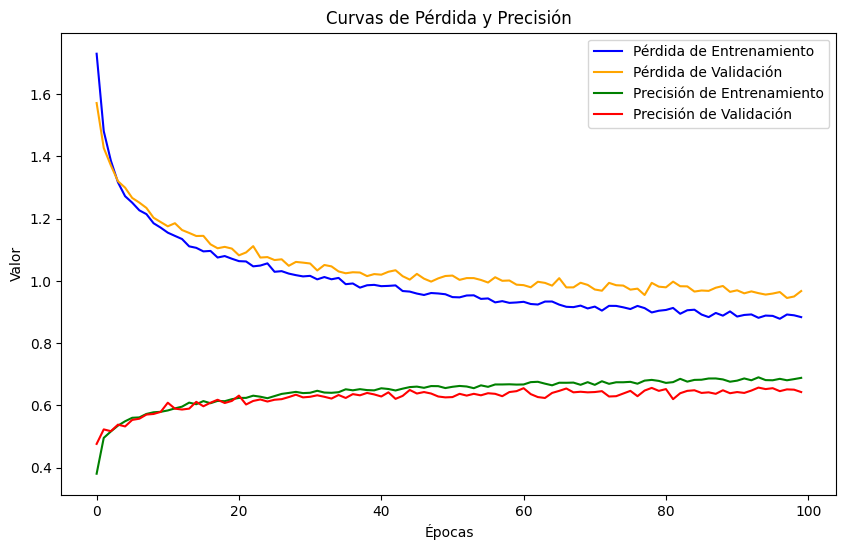

In [ ]:
import matplotlib.pyplot as plt

# Crear un solo subplot en una figura
fig, ax = plt.subplots(figsize=(10, 6))

# Graficar las curvas de pérdida
ax.plot(train_losses, label="Pérdida de Entrenamiento", color='blue')
ax.plot(val_losses, label="Pérdida de Validación", color='orange')

# Graficar las curvas de precisión
ax.plot(train_accuracies, label="Precisión de Entrenamiento", color='green')
ax.plot(val_accuracies, label="Precisión de Validación", color='red')

# Títulos y etiquetas
ax.set_title("Curvas de Pérdida y Precisión")
ax.set_xlabel("Épocas")
ax.set_ylabel("Valor")
ax.legend()

# Mostrar la gráfica
plt.show()


## 4. Validate our model

---
**Validation metrics**

---

Accuracy: 63.33%
              precision    recall  f1-score   support

     class_0       0.64      0.47      0.54        30
     class_1       0.50      0.63      0.56        30
     class_2       0.61      0.47      0.53        30
     class_3       0.73      0.63      0.68        30
     class_4       0.53      0.57      0.55        30
     class_5       0.60      0.87      0.71        30
     class_6       0.92      0.80      0.86        30

    accuracy                           0.63       210
   macro avg       0.65      0.63      0.63       210
weighted avg       0.65      0.63      0.63       210



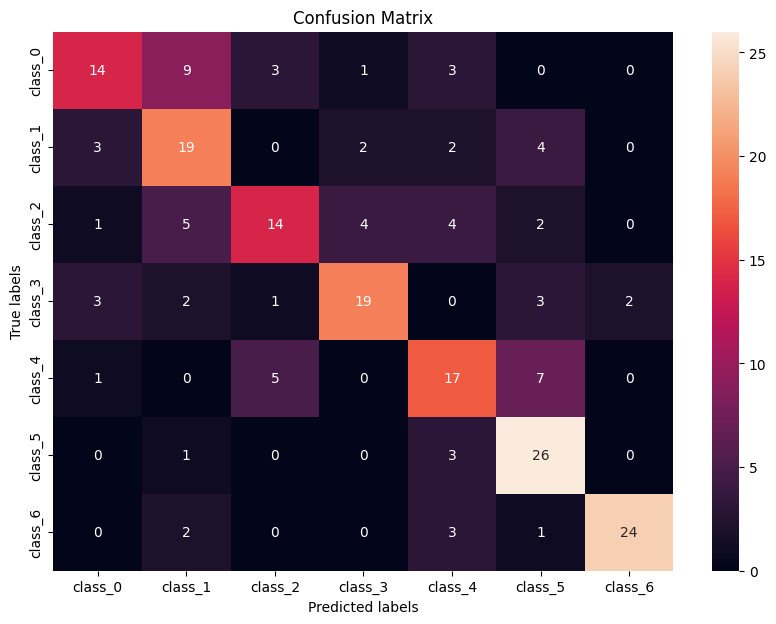

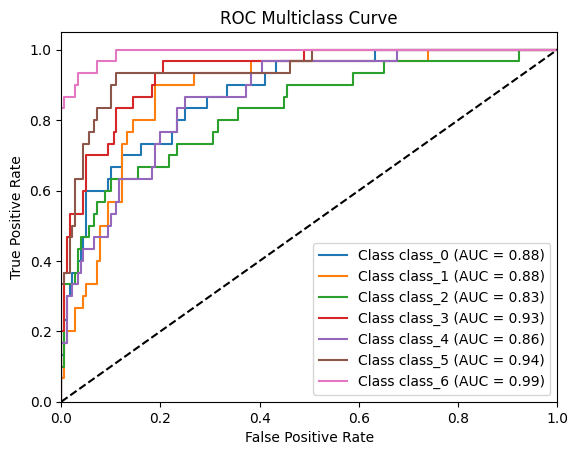

In [ ]:
import torch.nn.functional as F
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import numpy as np # Import the NumPy library

# Set the model to evaluation mode
model_ft.eval()

all_predictions = []
all_labels = []
all_probs = []  # Store probabilities for ROC curve

with torch.no_grad():
    for inputs, labels in dataloaders['test']:
        inputs = inputs.to(device)
        labels = labels.to(device)
        outputs = model_ft(inputs)

        probs = F.softmax(outputs, dim=1)  # Get probabilities
        _, predicted = torch.max(probs, 1)

        all_predictions.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())
        all_probs.extend(probs.cpu().numpy())

# Calculate accuracy
accuracy = accuracy_score(all_labels, all_predictions)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Generate a classification report
print(classification_report(all_labels, all_predictions, target_names=class_names))

# Confusion Matrix
cm = confusion_matrix(all_labels, all_predictions)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# ROC Multiclass Curve
y_test_bin = label_binarize(all_labels, classes=range(num_classes))
y_score = np.array(all_probs)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure()
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {class_names[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Multiclass Curve')
plt.legend(loc="lower right")
plt.show()

---
**Display predictions**

---

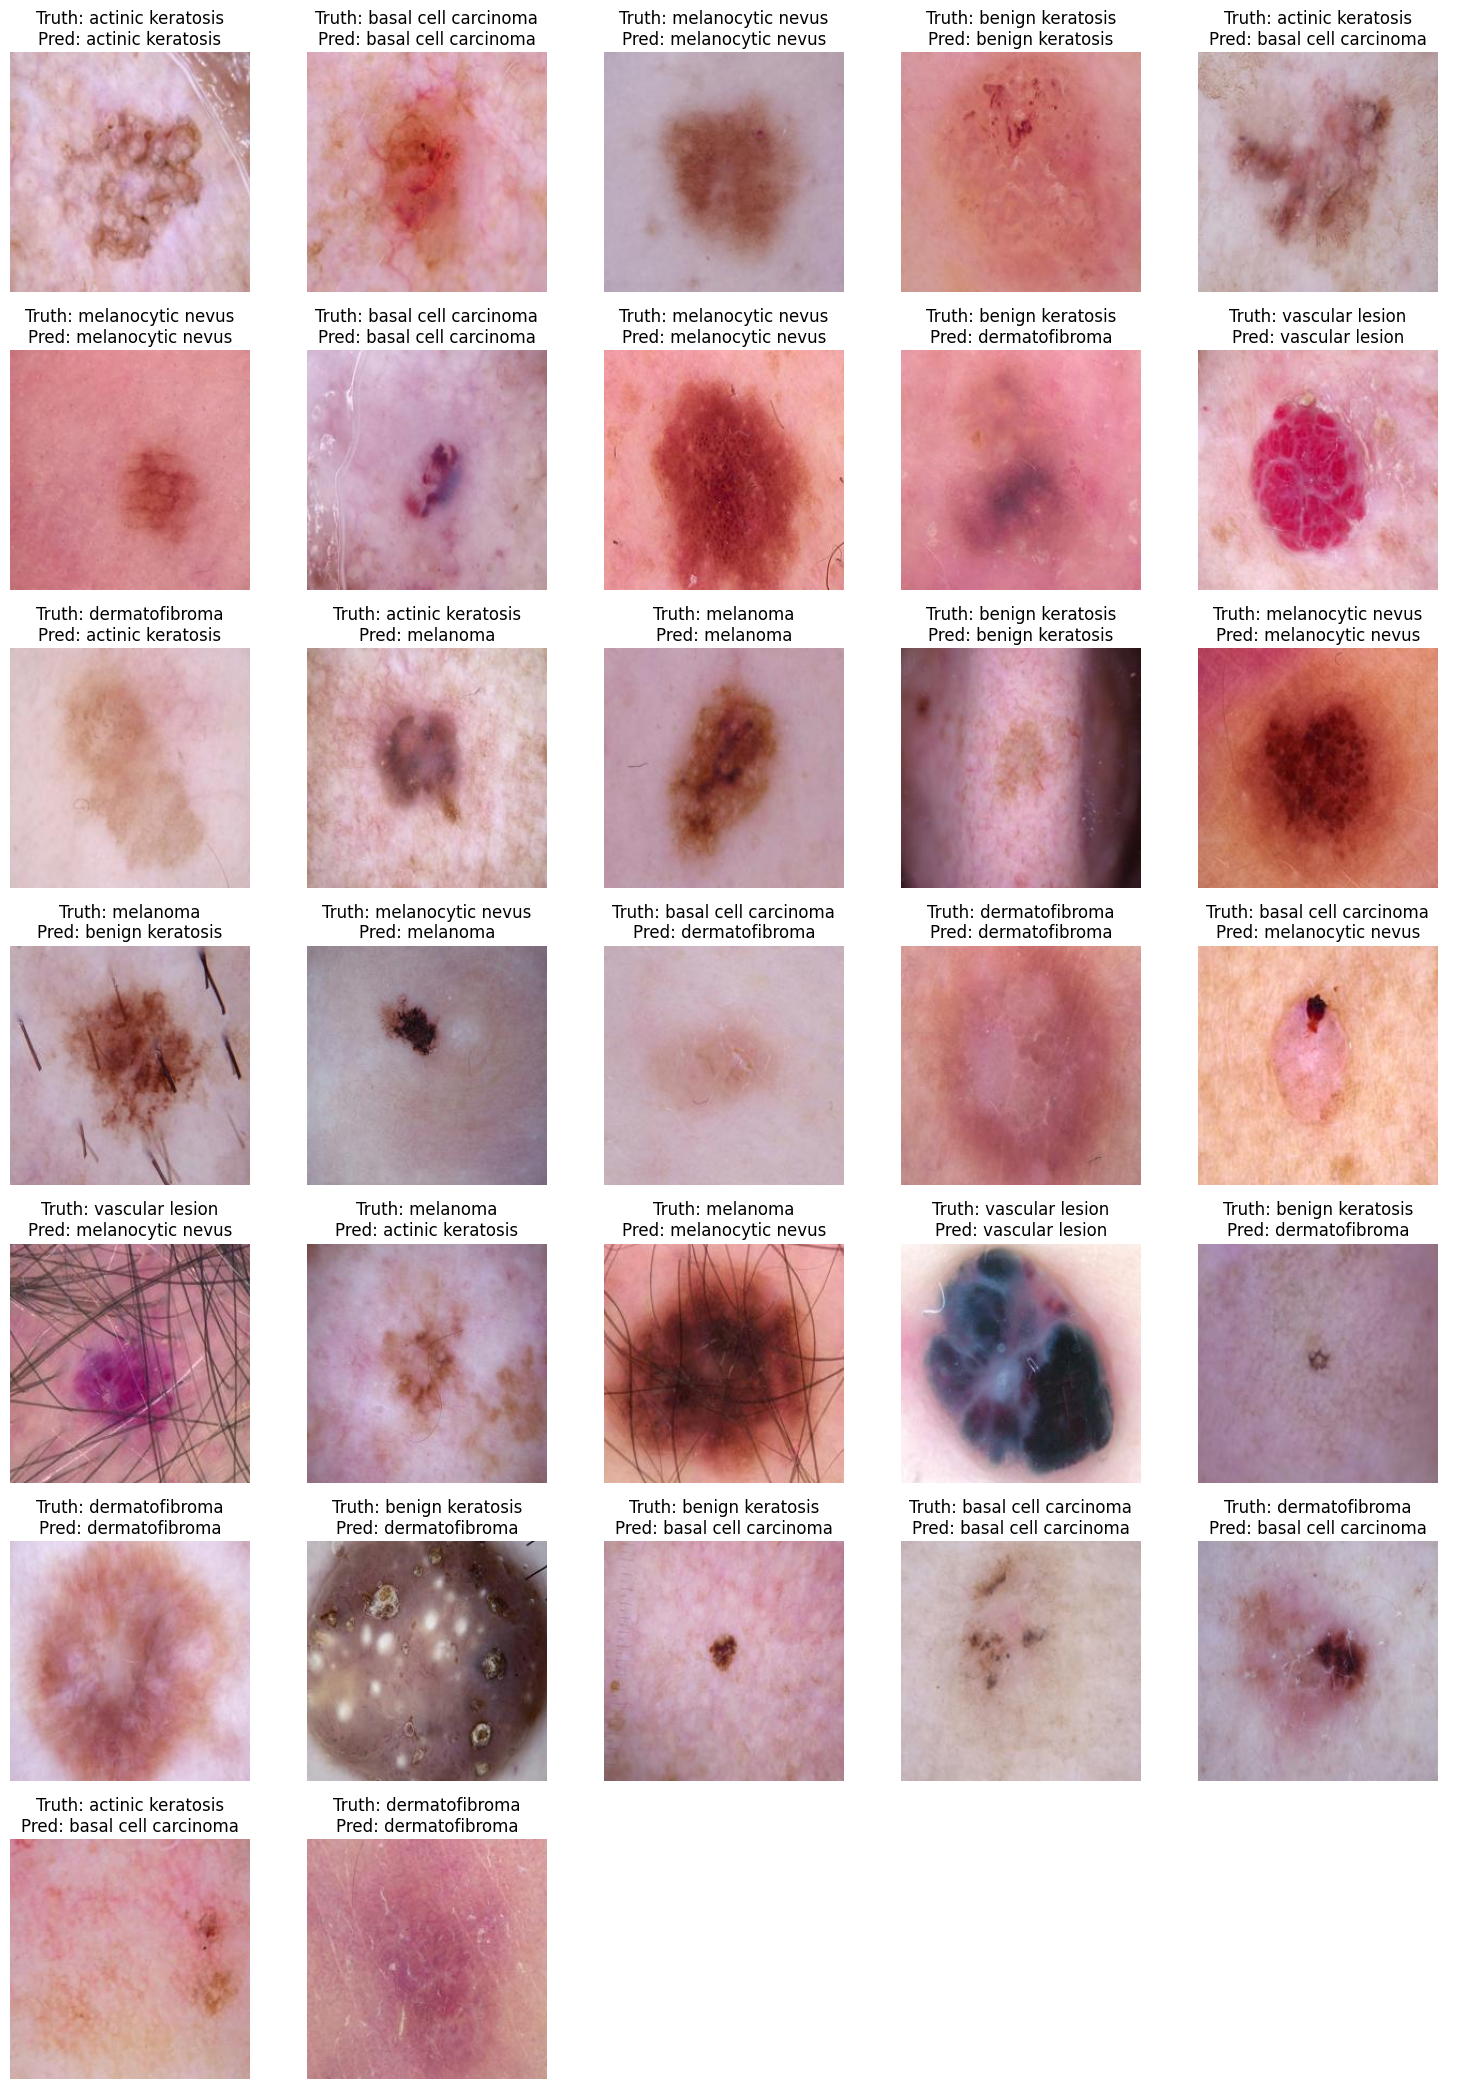

In [ ]:
import matplotlib.pyplot as plt

# Define class names
class_names = ['actinic keratosis', 'basal cell carcinoma', 'benign keratosis',
               'dermatofibroma', 'melanoma', 'melanocytic nevus', 'vascular lesion']

# Get a batch of images
data_iter = iter(dataloaders['test'])
images, labels = next(data_iter)

# Move to CPU if necessary
images = images.cpu()
labels = labels.cpu()

# Get predictions
model_ft.eval()
with torch.no_grad():
    outputs = model_ft(images.to(device))
    _, predicted = torch.max(outputs, 1)
predicted = predicted.cpu()

# Display images with labels and predictions
num_images = len(images)  # Number of images in the batch
num_cols = 5  # Adjust the number of columns as needed
num_rows = (num_images + num_cols - 1) // num_cols  # Calculate number of rows

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 3 * num_rows))

for i in range(num_images):
    row = i // num_cols
    col = i % num_cols
    image = images[i]
    label = labels[i]
    pred = predicted[i]

    # Denormalize image if necessary (assuming normalization was applied during preprocessing)
    # Replace with your normalization values if different
    mean = [0.485, 0.456, 0.406]
    std = [0.229, 0.224, 0.225]
    image = image * torch.tensor(std).view(3, 1, 1) + torch.tensor(mean).view(3, 1, 1)

    # Convert image to numpy and transpose for display
    image_np = image.numpy().transpose((1, 2, 0))

    axes[row, col].imshow(image_np)
    axes[row, col].set_title(f"Truth: {class_names[label]}\nPred: {class_names[pred]}")
    axes[row, col].axis('off')

# Hide any unused subplots
for i in range(num_images, num_rows * num_cols):
    row = i // num_cols
    col = i % num_cols
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()

## `NoteBook Practice 10`

---
Modify the notebook as necessary to improve the performance parameters of your transfer learning. Try to use a metric that combines the partial metrics to show that your model classifies better than the baseline model shown in this notebook. What you can modify includes:

---

### Instructions in order to improve the Notebook (Use these suggestions as needed):

ChatGPT can be your great allied. Use it for your convenence.

Several deep learning models are well-suited for transfer learning in PyTorch, particularly for image classification tasks. These models have been pre-trained on large datasets like ImageNet and can be fine-tuned for specific tasks. Here are some popular choices:

### 1. **VGG (e.g., VGG16, VGG19)**
   - **Description**: VGG models are simple yet powerful convolutional networks with a series of convolutional layers followed by fully connected layers. They are known for their uniform architecture with 3x3 convolution filters.
   - **Use Case**: VGG models are effective for image classification tasks and can be easily fine-tuned for new datasets.
   - **PyTorch**: Available in `torchvision.models` as `vgg16` and `vgg19`.

### 2. **ResNet (e.g., ResNet18, ResNet34, ResNet50, ResNet101, ResNet152)**
   - **Description**: As previously discussed, ResNet models are built using residual connections, which help in training very deep networks by preventing the degradation problem.
   - **Use Case**: ResNet models are highly versatile and commonly used for various image classification tasks, with deeper variants offering more complex feature extraction.
   - **PyTorch**: Available in `torchvision.models` as `resnet18`, `resnet34`, `resnet50`, etc.

### 3. **Inception (e.g., Inception v3)**
   - **Description**: Inception models use a more complex architecture with modules that apply convolutions of different sizes in parallel, capturing multi-scale features efficiently.
   - **Use Case**: Inception models are particularly good for image classification tasks where multi-scale feature learning is beneficial.
   - **PyTorch**: Available in `torchvision.models` as `inception_v3`.

### 4. **DenseNet (e.g., DenseNet121, DenseNet169, DenseNet201)**
   - **Description**: DenseNet models connect each layer to every other layer in a feed-forward fashion. This dense connectivity pattern leads to efficient feature reuse and helps mitigate the vanishing gradient problem.
   - **Use Case**: DenseNet models are effective for tasks requiring fine-grained feature extraction and are often used for image classification and segmentation.
   - **PyTorch**: Available in `torchvision.models` as `densenet121`, `densenet169`, etc.

### 5. **MobileNet (e.g., MobileNetV2, MobileNetV3)**
   - **Description**: MobileNet models are designed for efficiency, with a focus on reducing the number of parameters and computational cost, making them suitable for mobile and embedded applications.
   - **Use Case**: Ideal for deploying classification models on devices with limited resources.
   - **PyTorch**: Available in `torchvision.models` as `mobilenet_v2` and `mobilenet_v3_large`.

### 6. **EfficientNet (e.g., EfficientNetB0 to EfficientNetB7)**
   - **Description**: EfficientNet models optimize both the depth, width, and resolution of the network through a compound scaling method. They are known for achieving high accuracy with fewer parameters.
   - **Use Case**: EfficientNet models are great for image classification tasks that require a balance between accuracy and computational efficiency.
   - **PyTorch**: Available via third-party libraries like `efficientnet_pytorch`.

### 7. **AlexNet**
   - **Description**: One of the earliest deep convolutional networks that popularized deep learning, AlexNet has a simpler architecture but still serves as a good starting point for basic image classification tasks.
   - **Use Case**: Suitable for smaller datasets or educational purposes in transfer learning.
   - **PyTorch**: Available in `torchvision.models` as `alexnet`.

### 8. **SqueezeNet**
   - **Description**: SqueezeNet is a lightweight model designed to achieve AlexNet-level accuracy with significantly fewer parameters, making it suitable for deployment in resource-constrained environments.
   - **Use Case**: Ideal for scenarios where model size and inference speed are critical, such as on mobile or embedded devices.
   - **PyTorch**: Available in `torchvision.models` as `squeezenet1_0` and `squeezenet1_1`.

### 9. **Vision Transformer (ViT)**
   - **Description**: The Vision Transformer model applies the transformer architecture, originally designed for NLP, to image classification tasks. It divides images into patches and processes them as sequences, similar to words in text.
   - **Use Case**: ViT models are cutting-edge for image classification and can outperform traditional CNNs in some scenarios, particularly with large datasets.
   - **PyTorch**: Available through third-party libraries or by using implementations in `timm`.

### 10. **RegNet**
   - **Description**: RegNet models are a family of network designs discovered through neural architecture search (NAS). They offer a good trade-off between efficiency and accuracy across various model sizes.
   - **Use Case**: Useful for high-performance image classification with optimized computation.
   - **PyTorch**: Available in `torchvision.models` as `regnet_y_400mf`, `regnet_y_800mf`, etc.

These models can be easily loaded and fine-tuned using PyTorch's `torchvision.models` module or other specialized libraries. Fine-tuning typically involves replacing the final fully connected layer with one tailored to the new classification task and training the model on the new dataset.

Anyway, feel free to modify and adapt the exercise as needed to suit your learning objectives and preferences.

Happy coding!